<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/homework_2/HW2_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

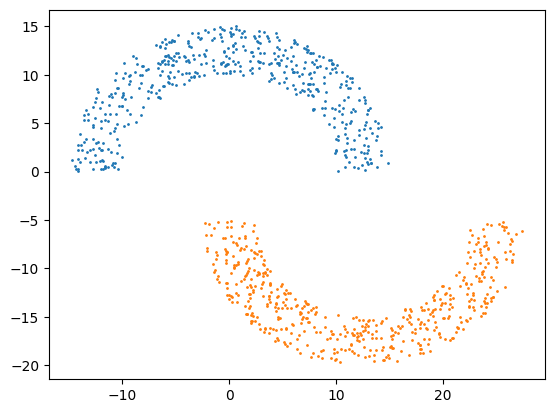

In [12]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [34]:
data_top = np.array(top)
labels_top = np.ones(data_top.shape[0])

data_bottom = np.array(bottom)
labels_bottom = -np.ones(data_bottom.shape[0])

data = np.vstack([data_top, data_bottom])
labels = np.hstack([labels_top, labels_bottom])

# Add bias term (x0 = 1) to each data point for the perceptron
data = np.hstack((np.ones((data.shape[0], 1)), data))

# Initialize weights to zero
w = np.zeros(data.shape[1])


In [35]:
def pla(data, labels, w):
    N, d = data.shape
    iterations = 0

    while True:
        # Randomly order the indices
        idx = np.random.permutation(N)
        update_made = False

        for i in idx:
            if np.sign(np.dot(w, data[i])) != labels[i]:
                w += labels[i] * data[i]
                update_made = True
                iterations += 1

        if not update_made:
            break

    return w, iterations

w, iterations = pla(data, labels, w)
print(f"PLA converged after {iterations} iterations.")

PLA converged after 27 iterations.


In [47]:
def linear_regression(data, labels):
    x_t = np.transpose(data)
    xt_x = np.matmul(x_t, data)
    xtx_inv = np.linalg.inv(xt_x)
    xt_x_x = np.matmul(xtx_inv, x_t)
    w = np.matmul(xt_x_x, labels)

    return w

w_lr = linear_regression(data, labels)
w_lr

array([ 0.23042822, -0.00803049,  0.07759698])

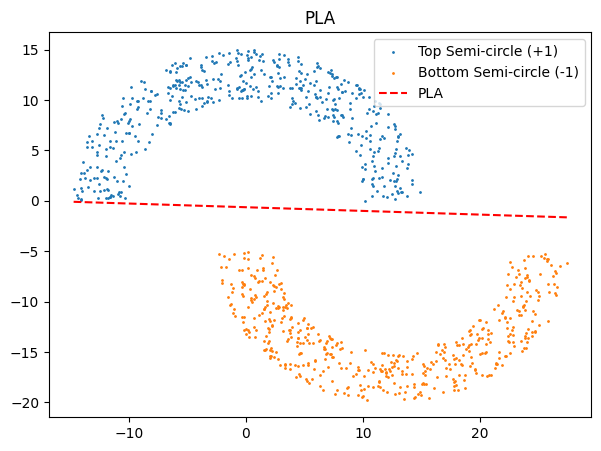

In [52]:
def plot_data_and_boundary(data, labels, w, title):
    plt.figure(figsize=(7, 5))

    plt.scatter(X1,Y1,s = 1, label='Top Semi-circle (+1)')
    plt.scatter(X2,Y2,s = 1, label='Bottom Semi-circle (-1)')

    x = np.linspace(min(data[:, 1]), max(data[:, 1]), 100)
    y = - (w[0] + w[1] * x) / w[2]
    plt.plot(x, y, '--', c ='red', label=title)

    plt.title(title)
    plt.legend()
    plt.show()

plot_data_and_boundary(data, labels, w, "PLA")

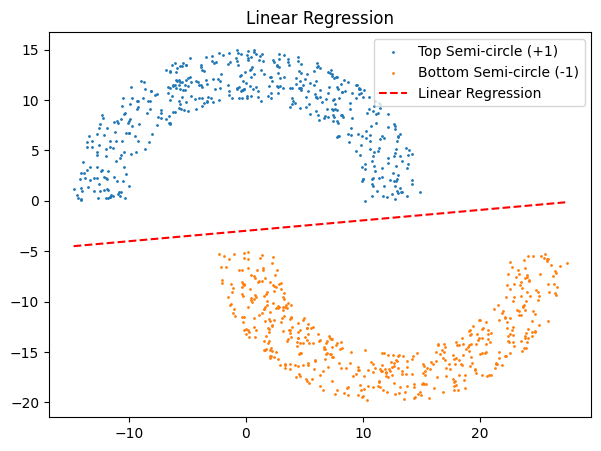

In [53]:
plot_data_and_boundary(data, labels, w_lr, "Linear Regression")